# Medallia Data Challenge

### Submitted by Prasad Pagade 8/25

In [825]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import warnings
warnings.filterwarnings('ignore')

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

In [458]:
df= pd.read_excel('C:\\Users\\PrasadPagade\\medalliainsightschallenge\\SampleData.xls')
df.head()

,Overall Experience,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Quality of business center,Timeliness of airport shuttle,Overall fitness center,Room service speed
0,9,10.0,8.0,10.0,10.0,9.0,NaN,10.0,10.0,10.0,NaN,NaN,10.0,NaN
1,10,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0
2,8,NaN,NaN,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,NaN,NaN,8.0,9.0,9.0,NaN,10.0,3.0,7.0,NaN,NaN,NaN,NaN
4,5,NaN,NaN,10.0,10.0,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN


In [459]:
df.describe()

,Overall Experience,Internet quality,Ease of making reservation,Attitude of hotel staff,Cleanliness of room,Quietness of room,Breakfast quality,Cleanliness of bathroom,Bar ambiance,Accuracy of bill,Quality of business center,Timeliness of airport shuttle,Overall fitness center,Room service speed
count,10000.000000,6256.000000,6256.000000,9926.000000,9927.000000,9904.000000,5643.000000,9408.000000,5316.000000,5192.000000,768.000000,929.000000,2129.000000,662.000000
mean,8.379900,8.902973,8.799552,8.806367,8.804271,8.279988,8.288322,8.791029,8.279533,8.495378,8.290365,8.054898,8.325035,8.705438
std,1.888315,1.372104,1.649486,1.769881,1.645266,2.178786,2.099691,1.649891,2.083064,2.064921,1.920265,1.897196,1.815901,1.891761
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


We observe that there are 10,000 records of survey data with 14 features. There are missing values in the data. The goal of this project is find areas of insights which drive the overall experience score.

In [492]:
# Calculating the missing values
df.isnull().sum().sort_values(ascending=False)

Room_service_speed               9338
Quality_of_business_center       9232
Timeliness_of_airport_shuttle    9071
Overall_fitness_center           7871
Accuracy_of_bill                 4808
Bar_ambiance                     4684
Breakfast_quality                4357
Ease_of_making_reservation       3744
Internet_quality                 3744
Cleanliness_of_bathroom           592
Quietness_of_room                  96
Attitude_of_hotel_staff            74
Cleanliness_of_room                73
Survey_Result                       0
Overall_Experience                  0
dtype: int64

In [761]:
# Cleaning the column names for easy access
df.columns = [x.strip().replace(' ', '_') for x in df.columns]
df.head()

[u'Overall_Experience',
 u'Internet_quality',
 u'Ease_of_making_reservation',
 u'Attitude_of_hotel_staff',
 u'Cleanliness_of_room',
 u'Quietness_of_room',
 u'Breakfast_quality',
 u'Cleanliness_of_bathroom',
 u'Bar_ambiance',
 u'Accuracy_of_bill',
 u'Quality_of_business_center',
 u'Timeliness_of_airport_shuttle',
 u'Overall_fitness_center',
 u'Room_service_speed',
 'Survey_Result']

In [867]:
# Correlation analsis
df.corr().sort_values('Overall_Experience', ascending=False)

,Overall_Experience,Internet_quality,Ease_of_making_reservation,Attitude_of_hotel_staff,Cleanliness_of_room,Quietness_of_room,Breakfast_quality,Cleanliness_of_bathroom,Bar_ambiance,Accuracy_of_bill,Quality_of_business_center,Timeliness_of_airport_shuttle,Overall_fitness_center,Room_service_speed
Overall_Experience,1.000000,0.334011,0.368711,0.675039,0.571241,0.474236,0.283502,0.511125,0.230434,0.223507,0.127968,0.122687,0.204810,0.106728
Attitude_of_hotel_staff,0.675039,0.330324,0.420631,1.000000,0.446057,0.331490,0.202018,0.411874,0.197166,0.203974,0.099036,0.097956,0.178540,0.096430
Cleanliness_of_room,0.571241,0.316851,0.296040,0.446057,1.000000,0.430522,0.279029,0.747696,0.193952,0.192764,0.113361,0.097313,0.159177,0.080844
Cleanliness_of_bathroom,0.511125,0.346453,0.325466,0.411874,0.747696,0.392468,0.297479,1.000000,0.226192,0.225383,0.122787,0.106390,0.161154,0.081561
Quietness_of_room,0.474236,0.222599,0.211482,0.331490,0.430522,1.000000,0.223828,0.392468,0.151616,0.131777,0.107772,0.092307,0.135194,0.067221
Ease_of_making_reservation,0.368711,0.768677,1.000000,0.420631,0.296040,0.211482,0.149267,0.325466,0.115758,0.115479,0.205043,0.217394,0.324386,0.192857
Internet_quality,0.334011,1.000000,0.768677,0.330324,0.316851,0.222599,0.151245,0.346453,0.118409,0.115381,0.238235,0.230008,0.357315,0.197627
Breakfast_quality,0.283502,0.151245,0.149267,0.202018,0.279029,0.223828,1.000000,0.297479,0.090088,0.071809,0.077311,0.028621,0.094284,0.044914
Bar_ambiance,0.230434,0.118409,0.115758,0.197166,0.193952,0.151616,0.090088,0.226192,1.000000,0.854959,0.032177,0.077331,0.097673,0.079073
Accuracy_of_bill,0.223507,0.115381,0.115479,0.203974,0.192764,0.131777,0.071809,0.225383,0.854959,1.000000,0.028220,0.073979,0.083615,0.075755


In [467]:
#Bad experience group
df_bad_exp = df[(df.Overall_Experience == 1) | (df.Overall_Experience == 2) | (df.Overall_Experience == 3)]

df_bad_exp.describe()


,Overall_Experience,Internet_quality,Ease_of_making_reservation,Attitude_of_hotel_staff,Cleanliness_of_room,Quietness_of_room,Breakfast_quality,Cleanliness_of_bathroom,Bar_ambiance,Accuracy_of_bill,Quality_of_business_center,Timeliness_of_airport_shuttle,Overall_fitness_center,Room_service_speed
count,370.000000,183.000000,180.000000,363.000000,358.000000,352.000000,188.000000,338.000000,155.000000,153.000000,21.000000,25.000000,52.000000,19.000000
mean,2.151351,6.775956,5.816667,4.584022,5.874302,5.042614,5.265957,6.162722,6.006452,6.196078,4.809524,5.600000,5.980769,5.684211
std,0.857810,2.327351,2.926426,2.894168,2.872327,3.159736,3.078911,2.806336,2.872839,2.863240,2.856905,3.068659,2.453412,3.300718
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,10.000000,10.000000


## Data Cleaning

Before we begin analyzing insights from the data, we need to clean our data.

### Step 1: Missing values

In [468]:
# List of columns and the missing values
df.isnull().sum().sort_values(ascending=False)

Room_service_speed               9338
Quality_of_business_center       9232
Timeliness_of_airport_shuttle    9071
Overall_fitness_center           7871
Accuracy_of_bill                 4808
Bar_ambiance                     4684
Breakfast_quality                4357
Ease_of_making_reservation       3744
Internet_quality                 3744
Cleanliness_of_bathroom           592
Quietness_of_room                  96
Attitude_of_hotel_staff            74
Cleanliness_of_room                73
Overall_Experience                  0
dtype: int64

Note that a lot of survey results are missing for questions like **Room_service_speed, Quality_of_business_center, Timeliness_of_airport_shuttle,Overall_fitness_center** etc. as seen above. It would be interesting to see if there is any trend in the ordering and response rate of these questions. Let's check that -                           

In [469]:
# View the column names
df.columns

Index([u'Overall_Experience', u'Internet_quality',
       u'Ease_of_making_reservation', u'Attitude_of_hotel_staff',
       u'Cleanliness_of_room', u'Quietness_of_room', u'Breakfast_quality',
       u'Cleanliness_of_bathroom', u'Bar_ambiance', u'Accuracy_of_bill',
       u'Quality_of_business_center', u'Timeliness_of_airport_shuttle',
       u'Overall_fitness_center', u'Room_service_speed'],
      dtype='object')

<a id='missingdata'></a>

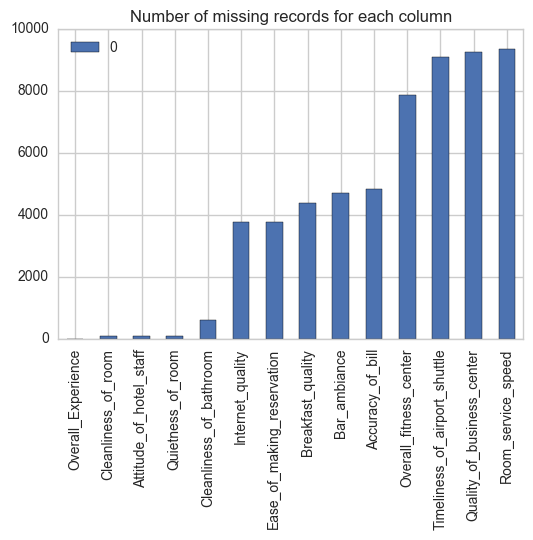

In [470]:
# Now lets try the line plot again with the new column
missing_values = pd.DataFrame(df.isnull().sum().sort_values())
missing_values.plot(kind='bar',title='Number of missing records for each column',)

Here, we can clearly see that the number missing responses increases drastically after guests take **Cleanliness_of_bathroom** question. This trend suggests that customer are finding the survey questions too lengthy and end up just running through it. Perhaps, consolidating the questions would be a good idea to get more complete responses from the guests!

<a id='survey'></a>

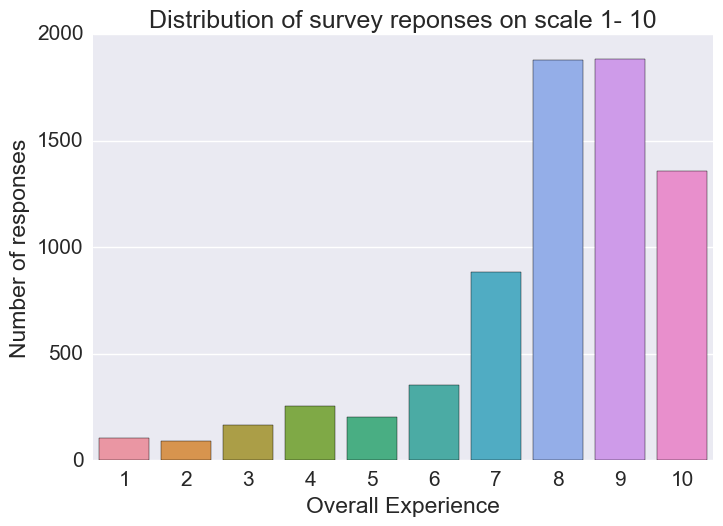

In [980]:
# Plot the distribution of Overall Experience
sns.countplot(data=df, x='Overall_Experience')
sns.plt.title('Distribution of survey reponses on scale 1- 10')
sns.plt.xlabel('Overall Experience')
sns.plt.ylabel('Number of responses')

Woah! This is a largely skewed data. The number of responses for dissatisfied customers (1 - 3) is very less compared to responses from satisfied customers.

Now we need to fill the missing data as there are less chances of getting the missing data from the customers. In order to guess the approximate value of the missing data, I am going to follow the below strategy:
 - Bin the Overall Experience column into 3 categories:
     - Dissatisfied (1 - 3)
     - Neutral (4 - 7)
     - Satisfied (8 - 10)
 - Take the mean of each column for that particular bin
 - Replace the missing values with the mode for each bin

In [472]:
# Step1 - Create bins
def create_bins(x):
    if x in [1,2,3]:
        return 'Dissatisfied'
    elif x in [4,5,6,7]:
        return 'Neutral'
    else:
        return 'Satisfied'


In [473]:
# Assign rows to each of the 3 bins
df['Survey_Result'] = df.Overall_Experience.apply(create_bins)
df.head()

,Overall_Experience,Internet_quality,Ease_of_making_reservation,Attitude_of_hotel_staff,Cleanliness_of_room,Quietness_of_room,Breakfast_quality,Cleanliness_of_bathroom,Bar_ambiance,Accuracy_of_bill,Quality_of_business_center,Timeliness_of_airport_shuttle,Overall_fitness_center,Room_service_speed,Survey_Result
0,9,10.0,8.0,10.0,10.0,9.0,NaN,10.0,10.0,10.0,NaN,NaN,10.0,NaN,Satisfied
1,10,10.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0,Satisfied
2,8,NaN,NaN,9.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Satisfied
3,8,NaN,NaN,8.0,9.0,9.0,NaN,10.0,3.0,7.0,NaN,NaN,NaN,NaN,Satisfied
4,5,NaN,NaN,10.0,10.0,10.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,Neutral


<a id='buckets'></a>

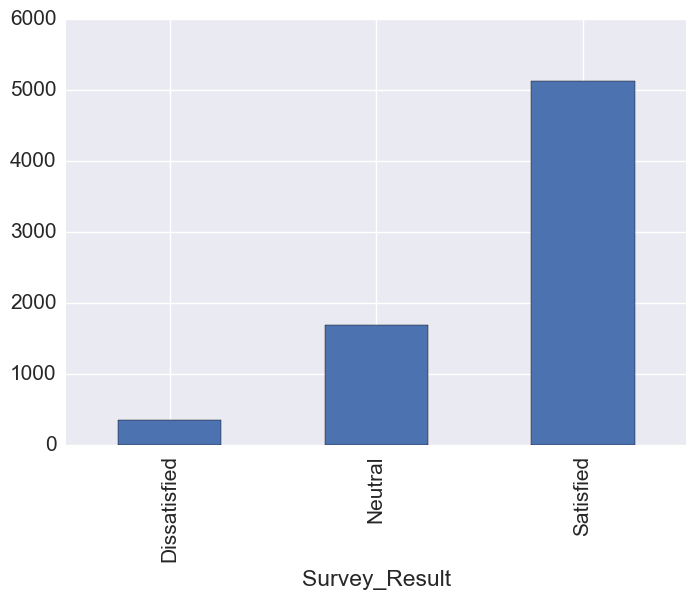

In [989]:
# Plot the bins
df.groupby('Survey_Result')['Overall_Experience'].size().plot(kind='bar')

In [474]:
# Check how many records are there in each bins.
df.Survey_Result.value_counts()

Satisfied       7919
Neutral         1711
Dissatisfied     370
Name: Survey_Result, dtype: int64

This softened the blow(unbalanced data) as we have enough data to extract insights from each bins.

In [475]:
# Step2 - Assign the mode for missing values for columns in each bin

# Calucalte the mode for each column by each bin
df_mean_missing = df.groupby('Survey_Result').mean().round(0)
df_mean_missing

,Overall_Experience,Internet_quality,Ease_of_making_reservation,Attitude_of_hotel_staff,Cleanliness_of_room,Quietness_of_room,Breakfast_quality,Cleanliness_of_bathroom,Bar_ambiance,Accuracy_of_bill,Quality_of_business_center,Timeliness_of_airport_shuttle,Overall_fitness_center,Room_service_speed
Survey_Result,,,,,,,,,,,,,,
Dissatisfied,2.0,7.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,5.0,6.0,6.0,6.0
Neutral,6.0,8.0,7.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
Satisfied,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0


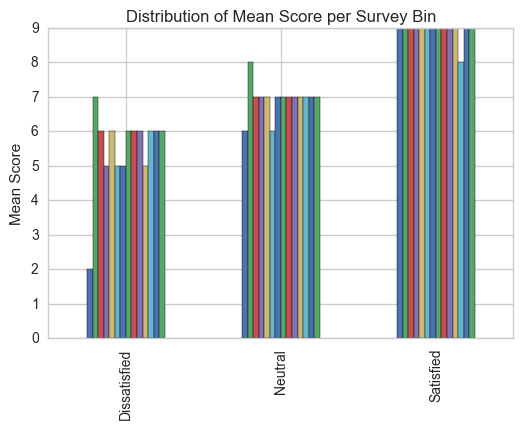

In [476]:
# Visualize the data from for the mean values
df_mean_missing.plot(kind='bar')
plt.title('Distribution of Mean Score per Survey Bin')
plt.ylabel('Mean Score')
plt.xlabel('')
plt.legend('')
plt.figure(figsize=[15,8])


Perfect! This makes sense as mean survey scores for each column is in order **Dissatisfied < Neutral < Satisfied**

In [504]:
# Sort our dataset based on the Survey Result column
df.sort_values('Survey_Result', inplace=True)


In [479]:
## df_IQ_D = df[df['Survey_Result'] == 'Dissatisfied'][['Internet_quality']]
##df_IQ_N = df[df['Survey_Result'] == 'Neutral'][['Internet_quality']]
##df_IQ_S = df[df['Survey_Result'] == 'Satisfied'][['Internet_quality']]

# df_IQ_D= df_IQ_D.fillna(7, inplace=True)
##df_IQ_D.fillna(value=7, inplace=True)
##df_IQ_N.fillna(value=8, inplace=True)
##df_IQ_S.fillna(value=9, inplace=True)


In [481]:
#df[['A', 'B', 'C']].apply(lambda x: x.fillna(value=df['D']))

#df.Internet_quality = df[ (df.Survey_Result == 'Dissatisfied') ]['Internet_quality'].fillna(7, inplace=True)

In [488]:
# Export the Dataframe and perform cleaning for saving time
df.to_excel('SampleData_cleaned.xlsx') # Preserved these steps to show the additional work done, but not ended up being used.

In [491]:
# Check the missing values
df_clean.isnull().sum()

Overall_Experience               0
Internet_quality                 0
Ease_of_making_reservation       0
Attitude_of_hotel_staff          0
Cleanliness_of_room              0
Quietness_of_room                0
Breakfast_quality                0
Cleanliness_of_bathroom          0
Bar_ambiance                     0
Accuracy_of_bill                 0
Quality_of_business_center       0
Timeliness_of_airport_shuttle    0
Overall_fitness_center           0
Room_service_speed               0
Survey_Result                    0
dtype: int64

### Step 2 - Remove Duplicates

We confirmed from the customers that the duplicated entries in our survey data is infact just the case where customers ended up giving similar reviews.  

Since there are **2827** duplicated records, I decided to remove them to see if it uncovers any additonal insight, Let's check.

In [972]:
df.drop_duplicates(inplace=True)
#df.corr().sort_values('Overall_Experience', ascending=False).round(2)['Overall_Experience']
df.isnull().sum()

Overall_Experience               0
Internet_quality                 0
Ease_of_making_reservation       0
Attitude_of_hotel_staff          0
Cleanliness_of_room              0
Quietness_of_room                0
Breakfast_quality                0
Cleanliness_of_bathroom          0
Bar_ambiance                     0
Accuracy_of_bill                 0
Quality_of_business_center       0
Timeliness_of_airport_shuttle    0
Overall_fitness_center           0
Room_service_speed               0
Survey_Result                    0
dtype: int64

Perfect, our data is now ready for analysis

## Exploratory Data Analysis

In [521]:
# Using the mean per bucket imputation
df_clean.corr().sort_values('Overall_Experience', ascending=False).round(2)['Overall_Experience']

Overall_Experience               1.00
Quality_of_business_center       0.81
Room_service_speed               0.80
Attitude_of_hotel_staff          0.74
Overall_fitness_center           0.70
Ease_of_making_reservation       0.66
Cleanliness_of_room              0.65
Cleanliness_of_bathroom          0.62
Internet_quality                 0.62
Breakfast_quality                0.61
Quietness_of_room                0.57
Accuracy_of_bill                 0.51
Bar_ambiance                     0.50
Timeliness_of_airport_shuttle   -0.12
Name: Overall_Experience, dtype: float64

Here, after using the mean/survey_result technique I noted that the correlation values have changed a lot. Hence, I decided to 
use a more conservation approach by replacing the missing values by **mean=5** and check the correlation values.

In [522]:
#Using mean=5 for filling missing values gives better intuitive results

df.fillna(5,inplace=True)
df.corr().sort_values('Overall_Experience', ascending=False).round(2)['Overall_Experience']

Overall_Experience               1.00
Attitude_of_hotel_staff          0.68
Cleanliness_of_room              0.57
Cleanliness_of_bathroom          0.51
Quietness_of_room                0.47
Ease_of_making_reservation       0.37
Internet_quality                 0.33
Breakfast_quality                0.28
Bar_ambiance                     0.23
Accuracy_of_bill                 0.22
Overall_fitness_center           0.20
Quality_of_business_center       0.13
Timeliness_of_airport_shuttle    0.12
Room_service_speed               0.11
Name: Overall_Experience, dtype: float64

Here, as noted before the correlation order changes **drastically** when we did the mean imputation by each of the 3 buckets(dissatified, neutral and satisfied). The other simple mean imputation gives us much better intuitve sense. So we will continue analyzing the latter. This shows that sometimes simple methods are more effective than implementing complex stuff!! 

### Step 1) Data Visualization

In this analysis, our goal is to find out what factors leads to a higher overall satisfaction for the guests staying in the hotel. Let's begin by exploring the relationship between different features with Overall Experience column.

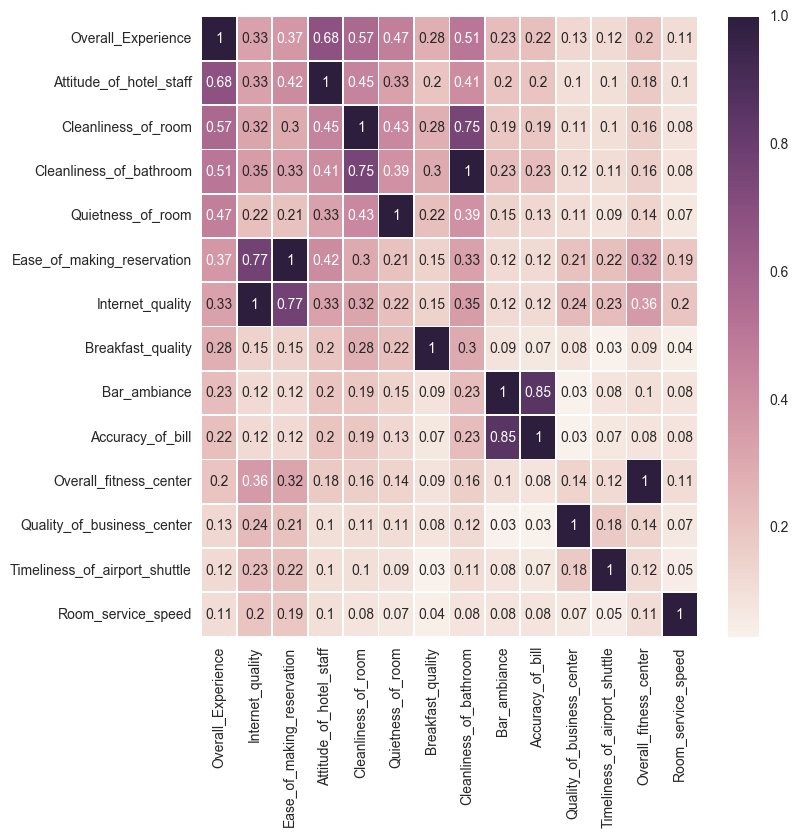

In [533]:
# Generation a heatmap to show correlation
corr = df.corr().sort_values('Overall_Experience', ascending=False).round(2)

# Arrange the heatmap size
fig, ax = plt.subplots(figsize=(8,8))       

# Produce the heatmap
sns.heatmap(corr, linewidths=.5, annot=True, ax=ax)

We can see that the following features are highly correlated with **Overall Experience:**
- Attitude of the hotel staff
- Cleanliness of the room
- Cleanliness of the bathroom
- Quietness of the room

Some other factors like "Ease of making reservations" and "Internet Quality" are worth noting.

This gives us a good start. Let's explore more about these observed features

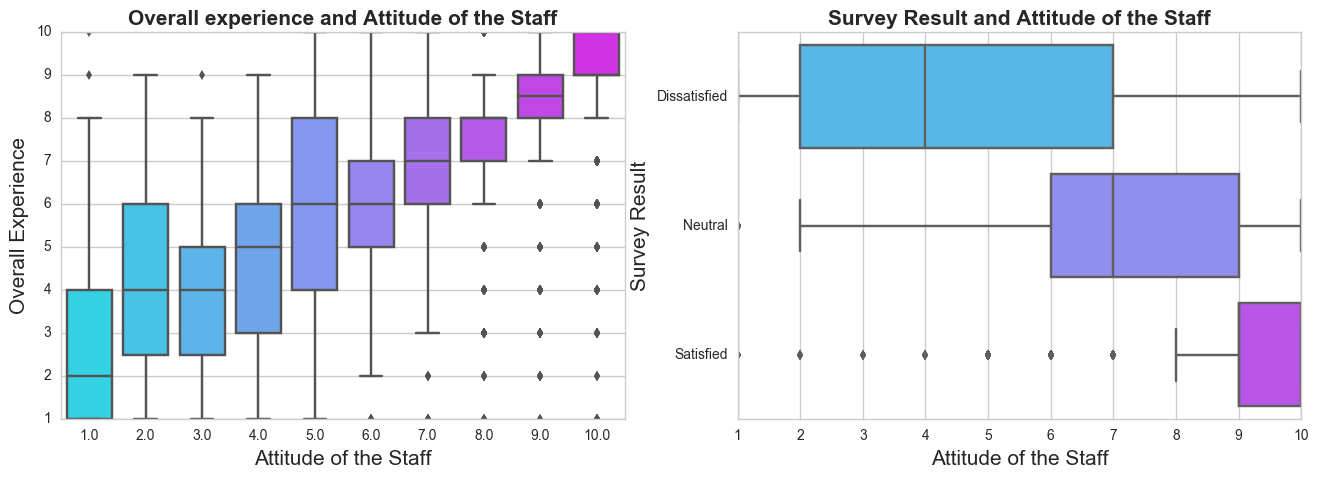

In [583]:
# Create a figure instance, and the two subplots
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.boxplot(x="Attitude_of_hotel_staff", y="Overall_Experience", data=df, ax=ax1, palette='cool')
sns.boxplot(x="Attitude_of_hotel_staff", y="Survey_Result", data=df, ax=ax2, palette='cool')
ax1.set_title('Overall experience and Attitude of the Staff',fontweight="bold", size=15)
ax2.set_title('Survey Result and Attitude of the Staff',fontweight="bold", size=15)

ax1.set_ylabel('Overall Experience', fontsize = 15)
ax1.set_xlabel('Attitude of the Staff', fontsize = 15)

ax2.set_ylabel('Survey Result', fontsize = 15)
ax2.set_xlabel('Attitude of the Staff', fontsize = 15) 




The boxplots show the trend that **Attitude of the Staff** clearly affects the **Overall experience** for the hotel guests.

We can see in the left plot that guests who rated low(1 - 3) for *"Attitude of the Staff"* rated average rating between (2-4) for their *"Overall experience"*

Based on the plots above let's create a function to produce additional plot similar to above

In [591]:
# Function to create Box Plot (Demonstrating code re-usability)
def create_boxplots(X1,Y1,data, title1, title2):
    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    sns.boxplot(x=X1, y=Y1, data=data, ax=ax1, palette='cool')
    sns.boxplot(x=X1, y='Survey_Result', data=df, ax=ax2, palette='cool')
    ax1.set_title(title1,fontweight="bold", size=15)
    ax2.set_title(title2,fontweight="bold", size=15)

    ax1.set_ylabel(Y1, fontsize = 15)
    ax1.set_xlabel(X1, fontsize = 15)

    ax2.set_ylabel('Survey Result', fontsize = 15)
    ax2.set_xlabel(X1, fontsize = 15) 

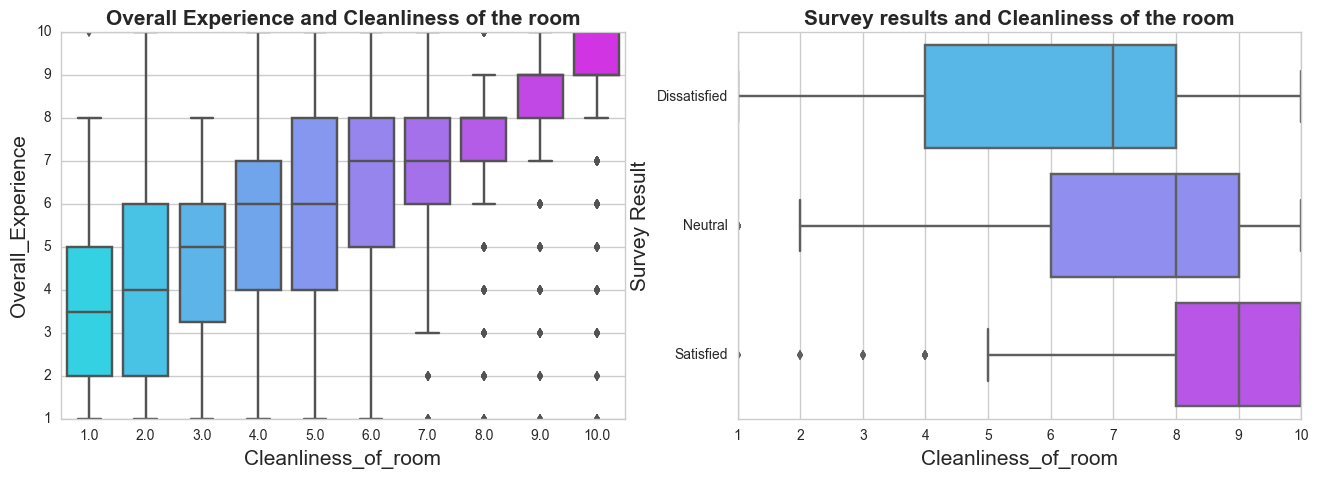

In [589]:
# Exploring Cleanliness of the room column
create_boxplots('Cleanliness_of_room','Overall_Experience',df,
                'Overall Experience and Cleanliness of the room',
                'Survey results and Cleanliness of the room')

As noted on the left plot, guest who rated low(1-3) on *"Cleanliness of the room"* rated their *"Overall Stay"* between 3 - 4.

The right plot shows the distribution of the rating per survey result. Note that all **Satisfied** guests rated highly(8 - 10) for the Cleanliness of the room.

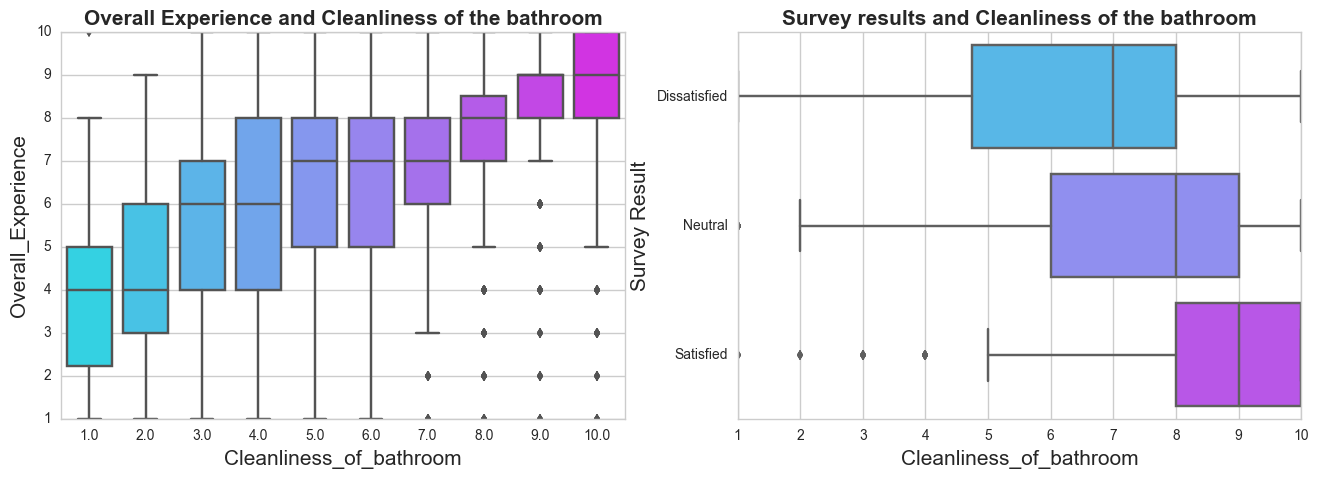

In [592]:
# Cleanliness of the bathroom
create_boxplots('Cleanliness_of_bathroom','Overall_Experience',df,
                'Overall Experience and Cleanliness of the bathroom',
                'Survey results and Cleanliness of the bathroom')


Cleanliness of the bathroom intuitively makes sense for a pleasant stay for a hotel guest! Here we note that lot of guests 
who rated the **"Cleanliness of bathroom"** in the scale (1-4) had **overall experience** in the range of scale 4-6


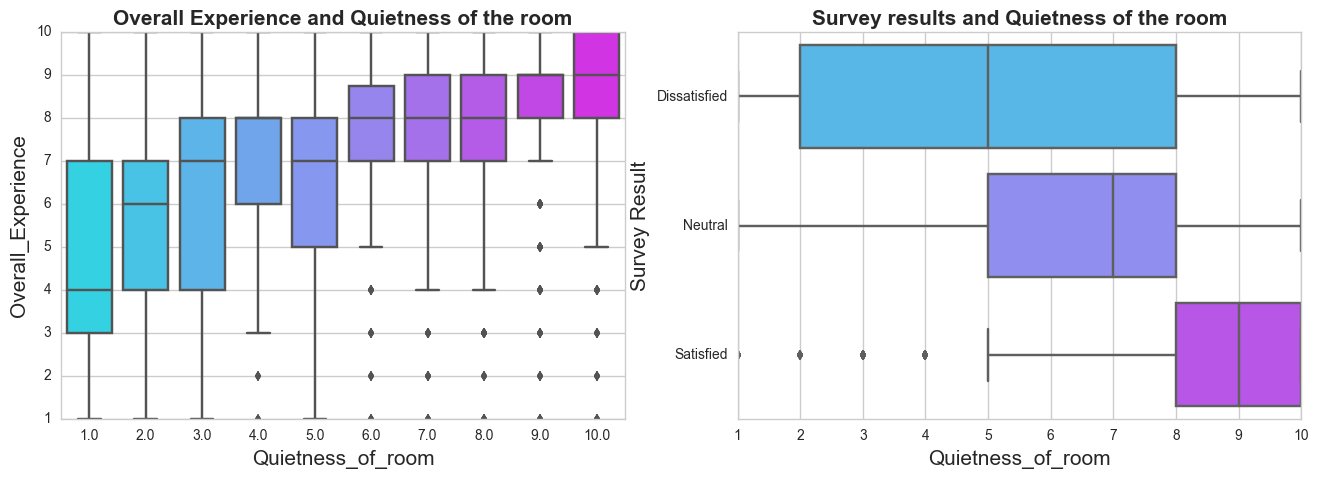

In [594]:
# # Quietness of the room
create_boxplots('Quietness_of_room','Overall_Experience',df,
                'Overall Experience and Quietness of the room',
                'Survey results and Quietness of the room')

Interesting! On the right plot we note that lot of "Dissatisfied" guests gave average rating of 5 for *"Quietness of the room"*. So it is not so clear if they were dissatisfied because of the Quietness of the room.

On the other hand, most of the satisfied customers in the right plot have a high rating for *"Quietness of the room"*. This indicates that guest do care about the quietness of room.

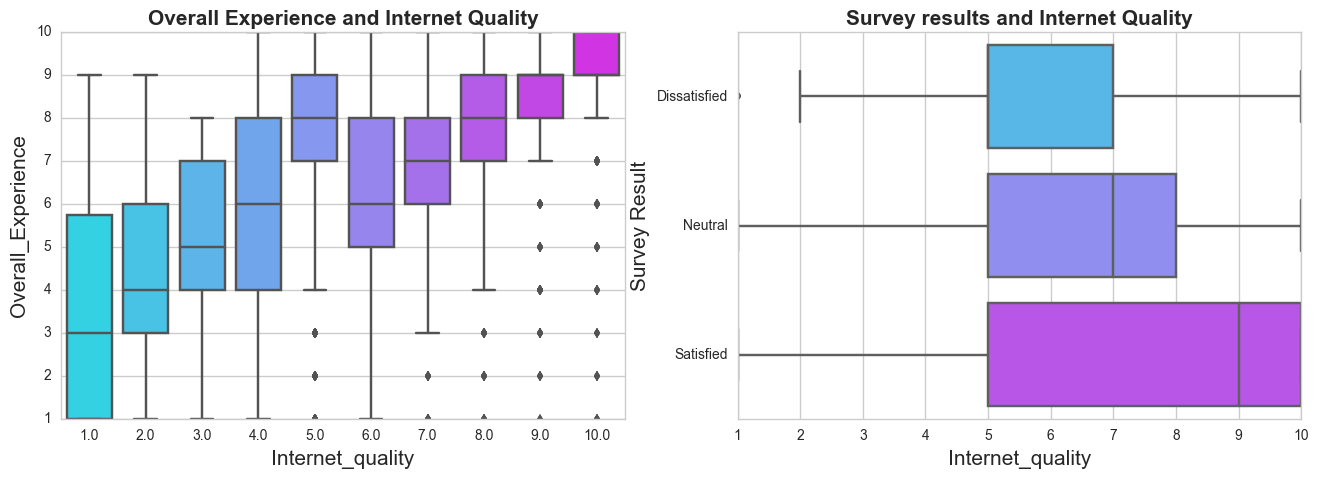

In [595]:
# Internet quality
create_boxplots('Internet_quality','Overall_Experience',df,
                'Overall Experience and Internet Quality',
                'Survey results and Internet Quality')

Again, minor trend that shows Internet quality makes a difference to the overall experience. But not as influential as the other ones.

Since we care more about the factors that drive an improved guest satisfaction, we will filter out the neutral range of ratings(guests who rated "Overall experience" in the range 4-7).
This will help us focus more on the differences between **Satisfied** and **Dissatisfied** guests.

Here, we make a subset of features of interests and take out any neutral ratings in them.

In [668]:
# Features of interest after filtering out Survey_Result = Neutral
df2 = df2[['Overall_Experience', 'Attitude_of_hotel_staff','Cleanliness_of_room', 'Cleanliness_of_bathroom', 
     'Internet_quality', 'Quietness_of_room', 'Survey_Result']]

# Pair plot to see the avg Overall SatisfactionInternet_quality
df2 = df2[df2.Survey_Result != 'Neutral']

Let's build a pair plot with the above dataset to see trends between Satisfied and dissatisfied guest with respect to their rating for - 'Overall_Experience', 'Attitude_of_hotel_staff','Cleanliness_of_room', 'Cleanliness_of_bathroom', 'Quietness_of_room'

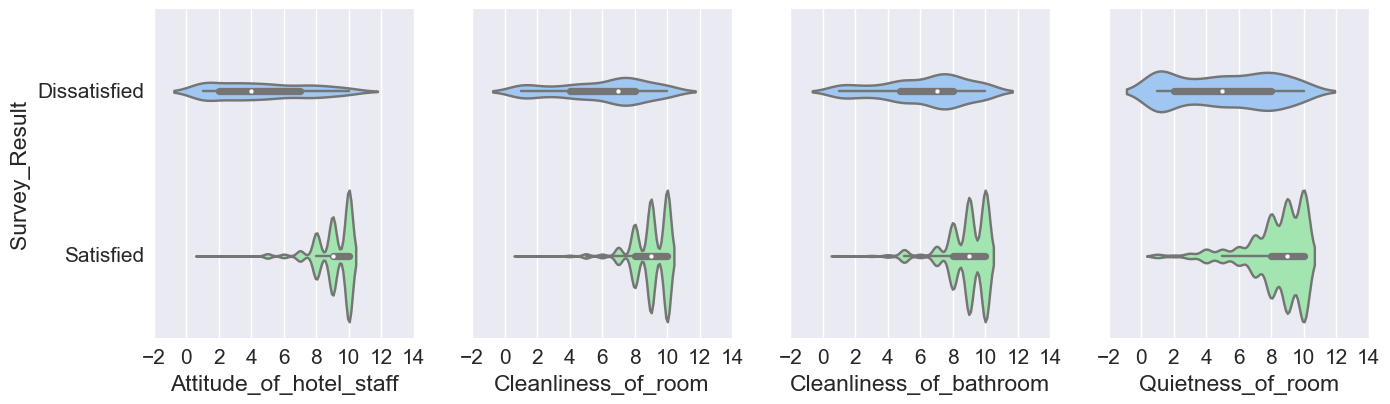

In [918]:
#Build a pairplot
g = sns.PairGrid(df2,
                 x_vars=["Attitude_of_hotel_staff",'Cleanliness_of_room', 'Cleanliness_of_bathroom', 'Quietness_of_room'],
                 y_vars=['Survey_Result'],
                 aspect=.75, size=4.5)
g.map(sns.violinplot, palette="pastel");

This plot reveals a lot of information. Note that the white dot in the center of the plot is the average rating for the x-axis. The bumpiness denotes the concentration/density of the survey scores.

Let's check each plot individually:

 - **Attitude of the hotel staff**
     - **Satisfied**: We see a lot of bumps around the 8 to 10 mark. This tells that guests who were satisfied with the hotel stay liked the way staff treated them.
     - **Dissatisfied**: We note that wider part is concentrated towards 0 to 1 rating and the average is around 4. This tells that the guests who were dissatisfied did not have a pleasant experience with the hotel staff


 - **Cleanliness of the room**
     - **Satisfied**: We see a lot of peaks are ratings of 8,9 and 10. This shows that guests who had a pleasant stay rated highly for the cleanliness of the room.
     - **Dissatisfied**: Here the distribution is stretched and widens rating of 7.


 - **Cleanliness of the bathroom**
     - **Satisfied**: We see a lot of peaks are ratings of 8,9 and 10. This shows that guests who had a pleasant stay rated highly for the cleanliness of the bathroom.
     - **Dissatisfied**: Here the distribution is stretched and widens rating of 7.


 - **Quietness of the room**: 
     - **Satisfied**: We have distinct bumps in the range 8 - 10. Overall the guests who were happy with their stay rated around 9 for the quietness of the room.
     - **Dissatisfied**: There plot peaks around 5. So, it is not clear whether they were unhappy because of noisy rooms.

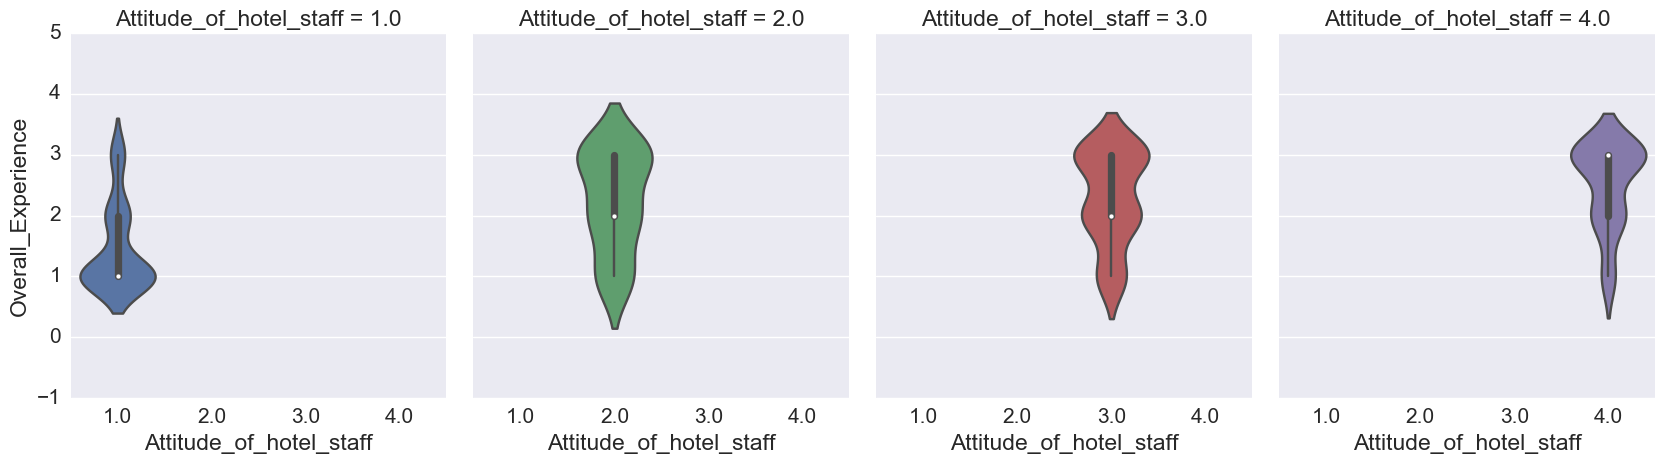

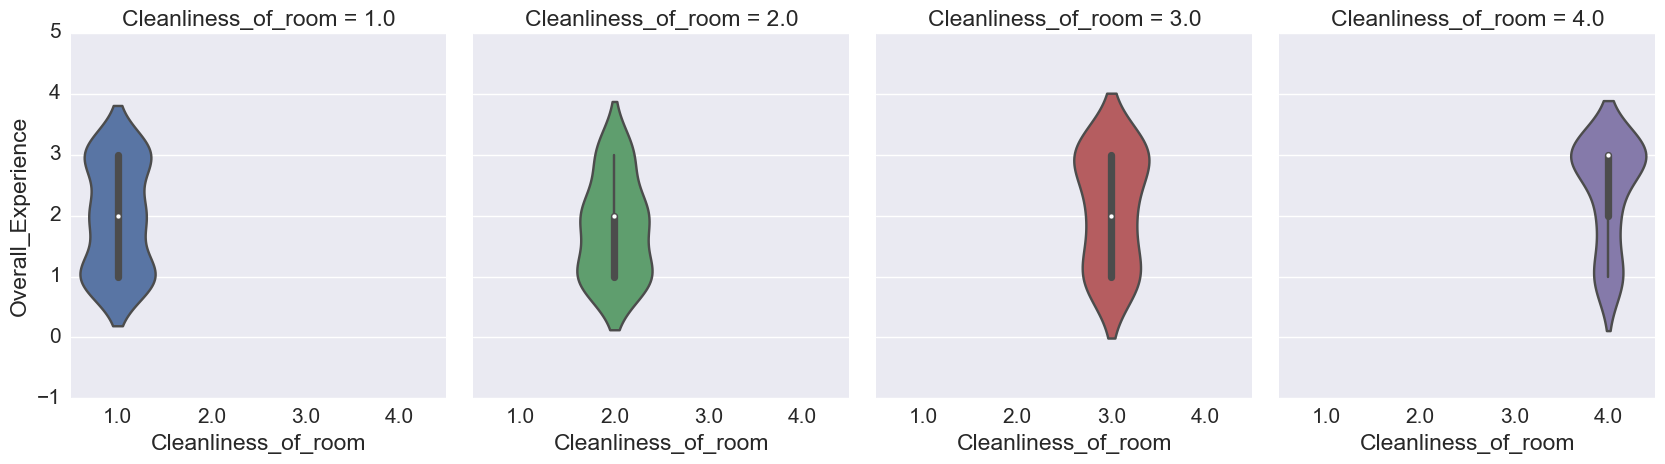

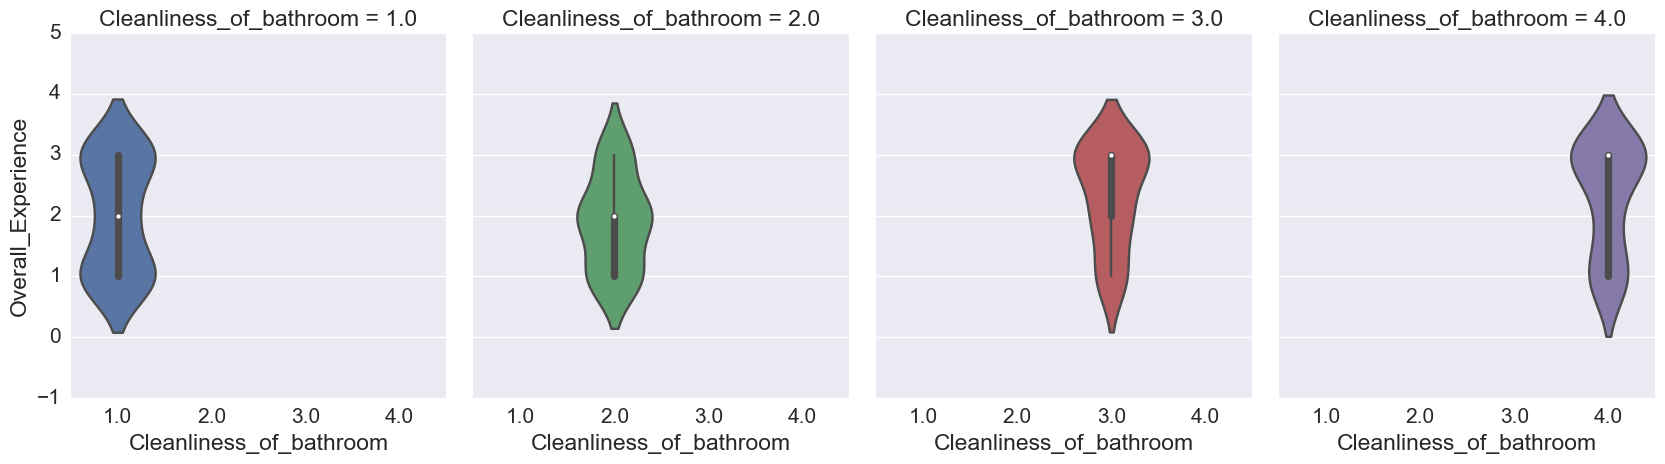

In [917]:
# Bad reviews
df_bad = df[df.Survey_Result == 'Dissatisfied'][['Overall_Experience', 'Attitude_of_hotel_staff','Cleanliness_of_room', 
                                                 'Cleanliness_of_bathroom']]

#sns.pairplot(df_bad)
sns.set(font_scale=1.5)
sns.factorplot(x="Attitude_of_hotel_staff", y="Overall_Experience",
                col="Attitude_of_hotel_staff", kind='violin',data=df_bad[df_bad.Attitude_of_hotel_staff < 5],
               aspect=.85,size = 5)

sns.factorplot(x="Cleanliness_of_room", y="Overall_Experience",
                col="Cleanliness_of_room", kind='violin',data=df_bad[df_bad.Cleanliness_of_room < 5],
               aspect=.85,size = 5)

sns.factorplot(x="Cleanliness_of_bathroom", y="Overall_Experience",
                col="Cleanliness_of_bathroom", kind='violin',data=df_bad[df_bad.Cleanliness_of_bathroom < 5],
               aspect=.85,size = 5)


These factorplots help us further dig deep into **Dissatisfied customers** to see what ratings they gave for our 3 most relevant features - *Attitude of the staff, Cleanliness of the room and Cleanliness of the bathroom*.

The way to read these plots are like the narrative - 
 - *"How many of my dissatified guests had an unpleasant stay because of bad attitude of the staff"*
 - *"How many of my dissatified guests had an unpleasant stay because of unclean rooms"*
 - *"How many of my dissatified guests had an unpleasant stay because of unclean bathrooms"*

### Step 2) Getting data ready for modelling

In [939]:
# Create feature list and target list
target = df.Overall_Experience.values
features = df[['Internet_quality','Ease_of_making_reservation','Attitude_of_hotel_staff','Cleanliness_of_room',
               'Quietness_of_room','Breakfast_quality','Cleanliness_of_bathroom','Bar_ambiance','Accuracy_of_bill',
               'Quality_of_business_center','Timeliness_of_airport_shuttle','Overall_fitness_center','Room_service_speed']]

my_feature_list = features.columns

# Test the format by printing
print features.shape
print target.shape
print my_feature_list

# Covert Dataframe to array
features = df[['Internet_quality','Ease_of_making_reservation','Attitude_of_hotel_staff','Cleanliness_of_room',
               'Quietness_of_room','Breakfast_quality','Cleanliness_of_bathroom','Bar_ambiance','Accuracy_of_bill',
               'Quality_of_business_center','Timeliness_of_airport_shuttle','Overall_fitness_center',
               'Room_service_speed']].values

print features

(7173, 13)
(7173L,)
Index([u'Internet_quality', u'Ease_of_making_reservation',
       u'Attitude_of_hotel_staff', u'Cleanliness_of_room',
       u'Quietness_of_room', u'Breakfast_quality', u'Cleanliness_of_bathroom',
       u'Bar_ambiance', u'Accuracy_of_bill', u'Quality_of_business_center',
       u'Timeliness_of_airport_shuttle', u'Overall_fitness_center',
       u'Room_service_speed'],
      dtype='object')
[[ 10.   8.  10. ...,   5.  10.   5.]
 [ 10.  10.  10. ...,   5.  10.  10.]
 [  5.   5.   9. ...,   5.   5.   5.]
 ..., 
 [  5.   5.   9. ...,   5.   5.   5.]
 [  5.   5.   1. ...,   5.   5.   5.]
 [  9.   9.   9. ...,   5.   5.   5.]]


# Machine Learning

### Step 1 Feature Importance

In this section, we will use advanced statistical methods to find out whether our initial hypothesis around the influence of
attitude of the hotel staff, cleanliness of the room and bathroom, quietness of the room on the **overall experience** of the hotel guests are true.

In [941]:
# K-best classifier

#Define classifier
kb_clf = SelectKBest(chi2,k=5)

# Fit the data
kb_clf.fit_transform(features, target)

# Calucate the scores
feature_scores = kb_clf.scores_

# Print the results of K-Best features
features_selected=[my_feature_list[i]for i in kb_clf.get_support(indices=True)]
features_scores_selected=[feature_scores[i]for i in kb_clf.get_support(indices=True)]
print ' '
print 'Selected 5 Features using K-Best', features_selected
print ''
print 'Feature Scores', features_scores_selected

# get the best feature
best_features = pd.merge(pd.DataFrame(my_feature_list), pd.DataFrame(feature_scores),left_index=True, right_index=True)
best_features.sort_values('0_y', ascending=False).head(5)

 
Selected 5 Features using K-Best [u'Ease_of_making_reservation', u'Attitude_of_hotel_staff', u'Cleanliness_of_room', u'Quietness_of_room', u'Cleanliness_of_bathroom']

Feature Scores [691.05086149293345, 1480.9523312408644, 925.62753857790369, 1181.7257419597352, 811.68236457774901]


,0_x,0_y
2,Attitude_of_hotel_staff,1480.952331
4,Quietness_of_room,1181.725742
3,Cleanliness_of_room,925.627539
6,Cleanliness_of_bathroom,811.682365
1,Ease_of_making_reservation,691.050861


Voila! Our best 5 features are:
- **Attitude of the hotel staff**
- **Quietness of the room**
- **Cleanliness of room**
- **Cleanliness of bathroom**
- **Ease of making reservation**

Let's use these features to model our data to predict Overall Experience -

In [928]:
# Updating our new features
features = df[['Attitude_of_hotel_staff','Quietness_of_room','Cleanliness_of_room','Cleanliness_of_bathroom',
               'Ease_of_making_reservation']].values

# Split the data into training and testing sets
X1_train,X1_test,Y1_train,Y1_test = train_test_split(features, target,test_size=0.4,random_state=42)

### Step 2) Logistic Regression

Since, this is a multiclass classification problem, we use Logistics regression. 

In [929]:
# Logistics regression

#Define classifier
clf_log1 = LogisticRegression()

# Fit training data
clf_log1.fit(X1_train,Y1_train)

# Predict using the model
pred = clf_log1.predict(X1_test)

print metrics.accuracy_score(Y1_test,pred)

#print metrics.classification_report(target_y,pred)

0.405574912892


An accuracy of 40%. This is not ideal but given the unbalanced nature of the dataset this was expected. 

### Step 3) Decision Trees

Let's see if the accuracy jumps for decision trees

In [934]:
clf_dt = DecisionTreeClassifier()

clf_dt.fit(X1_train,Y1_train)

pred = clf_dt.predict(X1_test)

print metrics.accuracy_score(Y1_test,pred)

0.397909407666


The accuracy went further down to 39% !

In [942]:
# Calculate feature importance
clf_dt.feature_importances_

#Print the feature importances results
print 'Attitude_of_hotel_staff: ', clf_dt.feature_importances_[0]
print 'Quietness_of_room: ',clf_dt.feature_importances_[1]
print 'Cleanliness_of_room: ',clf_dt.feature_importances_[2]
print 'Cleanliness_of_bathroom: ',clf_dt.feature_importances_[3]
print 'Ease_of_making_reservation: ',clf_dt.feature_importances_[4]

Attitude_of_hotel_staff:  0.241441764499
Quietness_of_room:  0.214006451399
Cleanliness_of_room:  0.168973854514
Cleanliness_of_bathroom:  0.192849155662
Ease_of_making_reservation:  0.182728773926


### Use Cross validation score to check if the accuracy increases

In [944]:
feature_cols =['Attitude_of_hotel_staff','Quietness_of_room','Cleanliness_of_room','Cleanliness_of_bathroom',
               'Ease_of_making_reservation']

X = df[feature_cols]

y= df.Overall_Experience


# store scores in scores object
# we can't use accuracy as our evaluation metric since that's only relevant for classification problems
# RMSE is not directly available so we will use MSE
#scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')

logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.414196226737


Again, not much luck! Let's change the target variable from **"Overall experience"** to **"Survey_Result"** and see if that helps

In [945]:
# Clean copy of the data
df_clean = df.copy()

# Define the feature - target
features = df_clean[['Attitude_of_hotel_staff','Quietness_of_room','Cleanliness_of_room','Cleanliness_of_bathroom',
               'Ease_of_making_reservation']].values
target = df_clean.Survey_Result

# Split the data into training and testing 
X_train,X_test,Y_train,Y_test = train_test_split(features, target,test_size=0.4,random_state=42)

Now let's use this new dataset to predict Survey Results using Logistics regression

In [953]:
# Re-do the ML part with new cleaned data
#Define classifier
clf_log2 = LogisticRegression()
# Fit training data
clf_log2.fit(X_train,Y_train)

# Predict using the model
pred = clf_log2.predict(X_test)

print metrics.accuracy_score(Y_test,pred)

#print metrics.classification_report(target_y,pred)

 0.794076655052


The accuracy drastically increases to **79%** when we change the target variable to predict survey result outcome. This makes sense as our data is highly imbalanced and skewed for overall experience ratings. Thus, "binning" the data to 3 categories(Satisfied, Neutral and Dissatisfied) based on the overall experience rating helps reduce the imbalance and gives us acceptable results.

In [957]:
clf_log2.predict([10,1,5,6,7])

array(['Neutral'], dtype=object)

In [992]:
# User test cases for prediction

#Case 1: 'Attitude_of_hotel_staff':    1
#        'Quietness_of_room':          5
#        'Cleanliness_of_room':        6
#        'Cleanliness_of_bathroom'     7
#        'Ease_of_making_reservation:  8
print 'The customer\'s predicted survey result is:', clf_log2.predict([1,5,6,7,8])[0]

#Case 1: 'Attitude_of_hotel_staff':    10
#        'Quietness_of_room':          6
#        'Cleanliness_of_room':        7
#        'Cleanliness_of_bathroom'     8
#        'Ease_of_making_reservation:  8
print 'The customer\'s predicted survey result is:', clf_log2.predict([10,6,7,8,9])[0]

The customer's predicted survey result is: Neutral
The customer's predicted survey result is: Satisfied


## Conclusion

- A lot of customers are not completing the survey questions. The [missing data](#missingdata) graph shows that the rate of skipping questions increases after hotel guests answer 5 questions. 

- The dataset is highly unbalanced as we have majority reponses only of [high rating](#survey) (8 to 10) for overall experience.

- Attitude of the hotel staff,Quietness of the room, Cleanliness of room,Cleanliness of bathroom and Ease of making reservation are most influential factors driving customer experience.

- Attitude of the staff is the most sensitive factor for a good/bad customer experience.

- Creating [Survey Result column](#buckets) (Satisfied, Neutral, Dissatisfied) helped distribute the unbalanced data into 3 buckets which were later used for predicting customer's experience staying at the hotel.